In [83]:
import pandas as pd
#pd.set_option('display.max_rows', None)

import numpy as np
import matplotlib.pyplot as plt

In [84]:
df = pd.read_excel('dati.xlsx', parse_dates=True)
df.head()

,Calendario,Quantita,Tipologia
0,2021-05-05,2.00,Spine
1,2021-05-21,3.25,Spine
2,2021-05-25,228.00,Spine
3,2021-05-26,181.80,Spine
4,2021-05-27,256.00,Spine


In [85]:
copia_df=df.copy()

In [86]:
df_bar=copia_df[copia_df['Tipologia']=='Bar']
df_bar=df_bar.drop('Tipologia',axis=1)
df_bar.head()

,Calendario,Quantita
1040,2021-05-05,0.54
1041,2021-05-25,31.00
1042,2021-05-26,33.00
1043,2021-05-27,24.00
1044,2021-05-28,31.00


In [87]:
df_bar.describe()

,Quantita
count,519.000000
mean,49.427514
std,29.311416
min,0.540000
25%,29.000000
50%,44.000000
75%,64.000000
max,188.000000


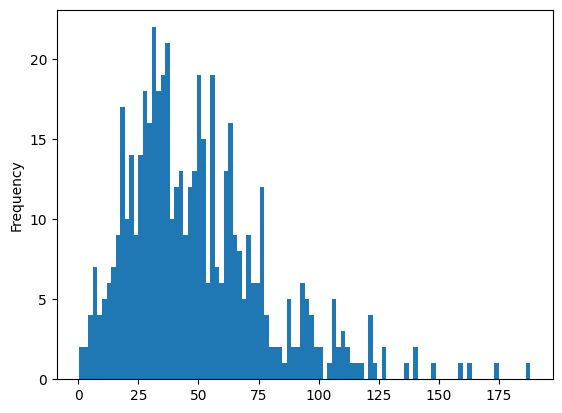

In [88]:
df_bar['Quantita'].plot(kind='hist', bins=100);

In [89]:
df_bar_rid = df_bar[(df_bar['Quantita']<109)]

In [90]:
df_bar_rid.describe()

,Quantita
count,496.000000
mean,45.639435
std,23.523647
min,0.540000
25%,28.000000
50%,42.000000
75%,61.265000
max,108.960000


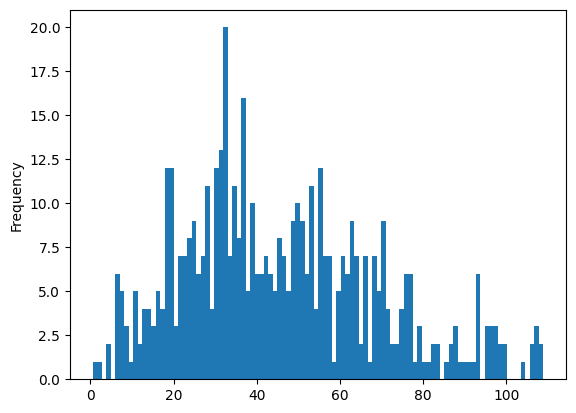

In [91]:
df_bar_rid['Quantita'].plot(kind='hist', bins=100);

In [92]:
from prophet import Prophet

In [93]:
df_bar_rid.head()

,Calendario,Quantita
1040,2021-05-05,0.54
1041,2021-05-25,31.00
1042,2021-05-26,33.00
1043,2021-05-27,24.00
1044,2021-05-28,31.00


In [94]:
df_bar.head()

,Calendario,Quantita
1040,2021-05-05,0.54
1041,2021-05-25,31.00
1042,2021-05-26,33.00
1043,2021-05-27,24.00
1044,2021-05-28,31.00


In [95]:
df_bar_rid.head()

,Calendario,Quantita
1040,2021-05-05,0.54
1041,2021-05-25,31.00
1042,2021-05-26,33.00
1043,2021-05-27,24.00
1044,2021-05-28,31.00


In [96]:
df_bar_rid.columns = ['ds','y']

In [97]:
df_bar_rid = df_bar_rid.reset_index()

In [98]:
df_bar_rid = df_bar_rid.drop('index',axis=1)
df_bar_rid.head()

,ds,y
0,2021-05-05,0.54
1,2021-05-25,31.00
2,2021-05-26,33.00
3,2021-05-27,24.00
4,2021-05-28,31.00


In [99]:
m = Prophet(daily_seasonality  = False,
            weekly_seasonality = True,
            yearly_seasonality = False,
            seasonality_mode   ='additive',
            interval_width=0.95,
            )
#model.add_regressor('summer_temp',standardize=False, mode='additive')
model = m.fit(df_bar_rid)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ALESSA~1\\AppData\\Local\\Temp\\tmpblgrqa4h\\fosh4tb5.json'

In [ ]:
future = model.make_future_dataframe(periods=60) #di default Prophet usa freq='D', cioè usa i giorni come frequenza
future.tail()

,ds
551,2023-01-17
552,2023-01-18
553,2023-01-19
554,2023-01-20
555,2023-01-21


In [ ]:
forecast = model.predict(future)
forecast.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
496,2022-11-23,49.160742,6.749413,86.576366,49.160742,49.160746,-3.711889,-3.711889,-3.711889,-3.711889,-3.711889,-3.711889,0.0,0.0,0.0,45.448853
497,2022-11-24,49.195965,4.904006,79.717265,49.193547,49.199753,-7.401751,-7.401751,-7.401751,-7.401751,-7.401751,-7.401751,0.0,0.0,0.0,41.794214
498,2022-11-25,49.231187,21.059976,96.413936,49.223947,49.240448,8.964789,8.964789,8.964789,8.964789,8.964789,8.964789,0.0,0.0,0.0,58.195977
499,2022-11-26,49.266410,32.804035,109.599009,49.253025,49.282383,22.017939,22.017939,22.017939,22.017939,22.017939,22.017939,0.0,0.0,0.0,71.284349
500,2022-11-27,49.301633,11.885515,86.127845,49.279319,49.324139,-1.273595,-1.273595,-1.273595,-1.273595,-1.273595,-1.273595,0.0,0.0,0.0,48.028038
501,2022-11-28,49.336855,-3.430908,73.999774,49.305572,49.367525,-12.808601,-12.808601,-12.808601,-12.808601,-12.808601,-12.808601,0.0,0.0,0.0,36.528254
502,2022-11-29,49.372078,1.395761,83.429197,49.331996,49.415709,-5.786893,-5.786893,-5.786893,-5.786893,-5.786893,-5.786893,0.0,0.0,0.0,43.585185
503,2022-11-30,49.407301,3.981313,83.813808,49.354483,49.460913,-3.711889,-3.711889,-3.711889,-3.711889,-3.711889,-3.711889,0.0,0.0,0.0,45.695412
504,2022-12-01,49.442523,1.790966,80.869935,49.376286,49.505512,-7.401751,-7.401751,-7.401751,-7.401751,-7.401751,-7.401751,0.0,0.0,0.0,42.040772
505,2022-12-02,49.477746,19.361984,97.361104,49.396278,49.550063,8.964789,8.964789,8.964789,8.964789,8.964789,8.964789,0.0,0.0,0.0,58.442535


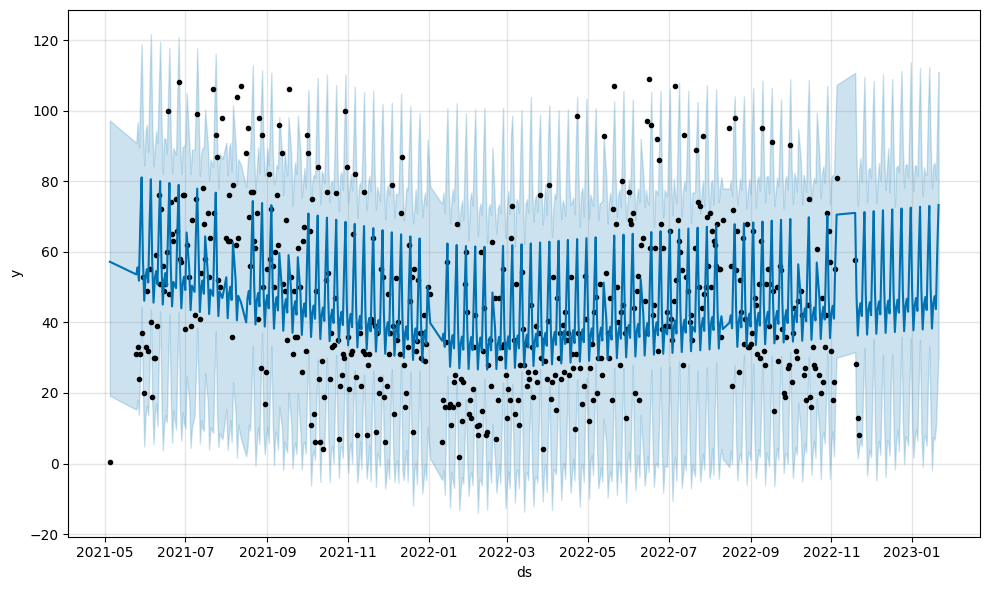

In [ ]:
model.plot(forecast);

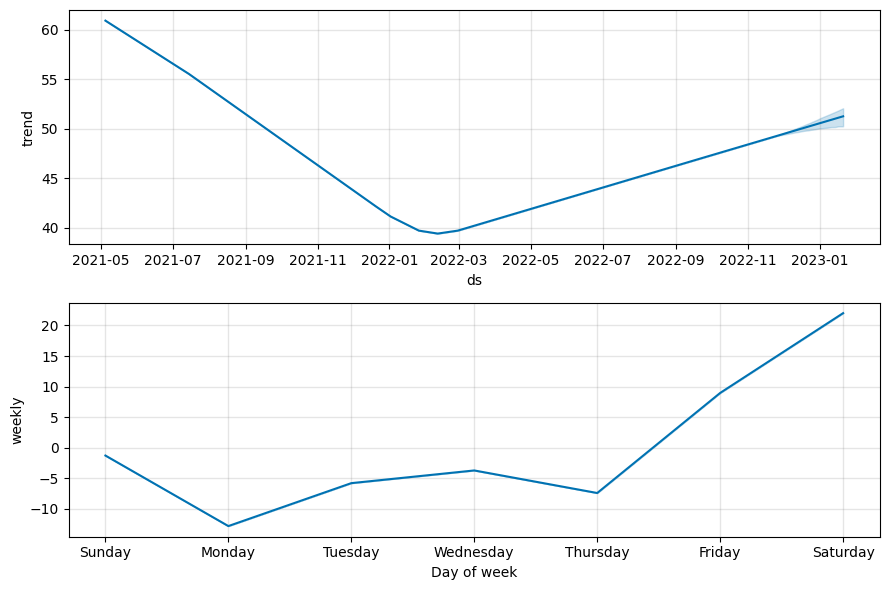

In [ ]:
model.plot_components(forecast);

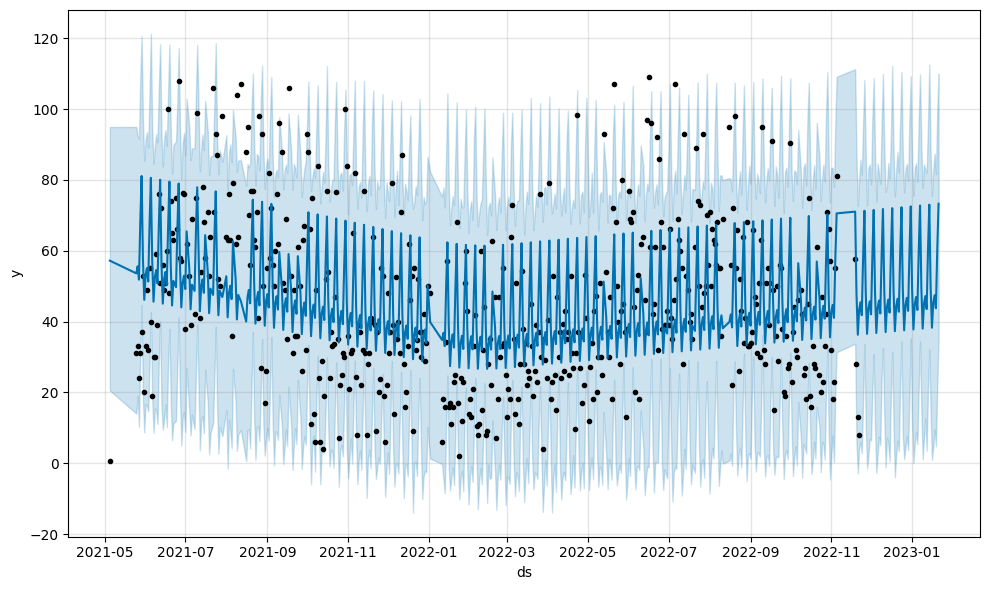

In [ ]:
future = model.make_future_dataframe(60) #prevede un certo numero di freq in avanti, ad esempio 2 con freq='W' prevede 2 settimane nel futuro
forecast = model.predict(future)
fig = model.plot(forecast)

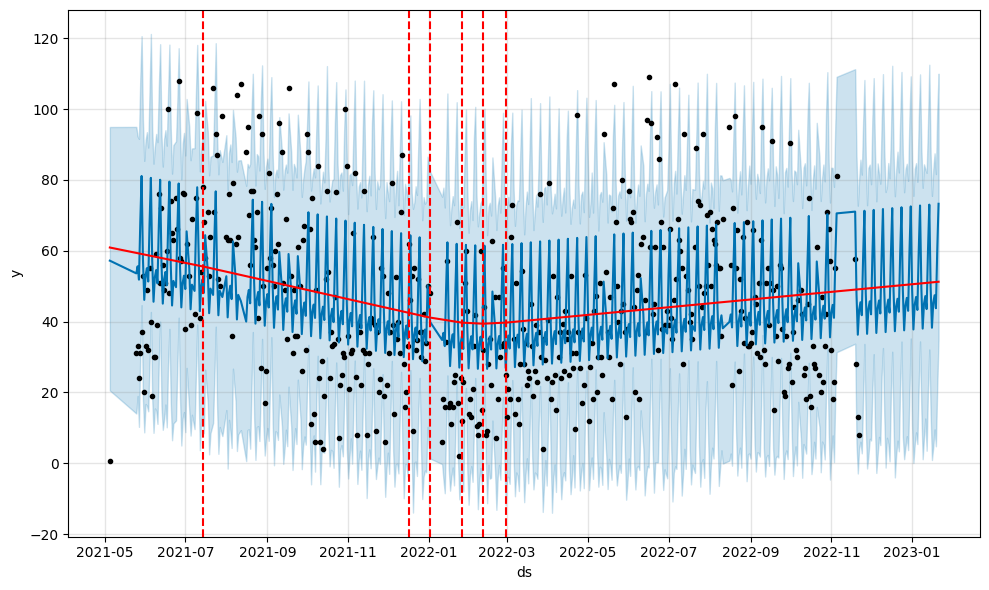

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

#Change to Multiplicative

19:49:54 - cmdstanpy - INFO - Chain [1] start processing
19:49:54 - cmdstanpy - INFO - Chain [1] done processing


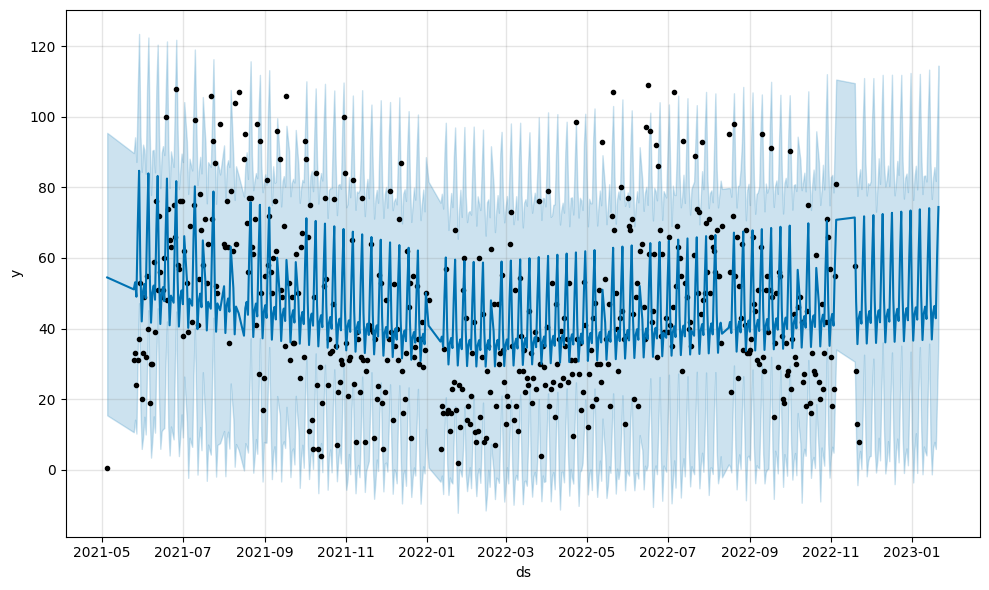

In [ ]:
m = Prophet(daily_seasonality  = False,
            weekly_seasonality = True,
            yearly_seasonality = False,
            seasonality_mode = 'multiplicative',
            interval_width=0.95,
            )
model = m.fit(df_bar_rid)
forecast = model.predict(future)
fig = model.plot(forecast)

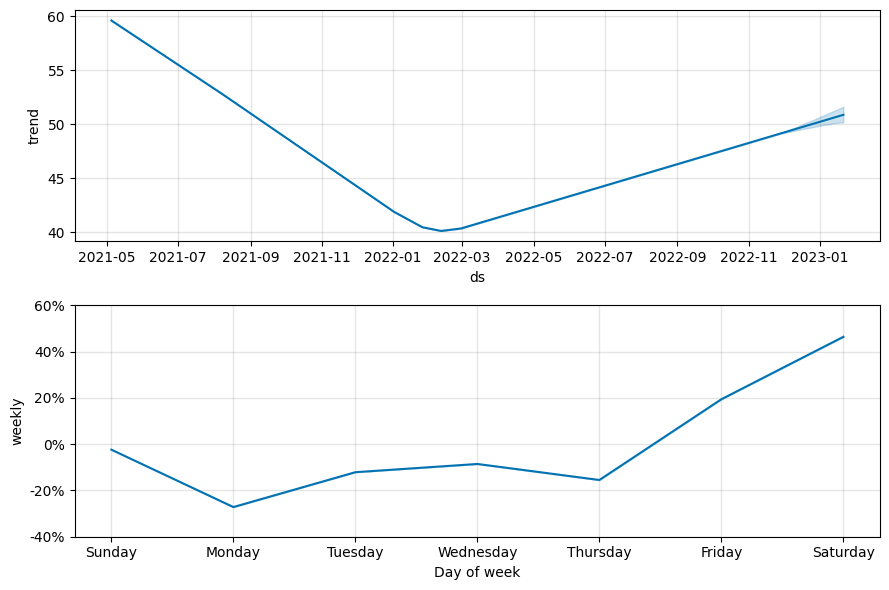

In [ ]:
fig = model.plot_components(forecast)

In [ ]:
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [ ]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'multiplicative',
               'condition_name': None})])

In [ ]:
model.component_modes

{'additive': ['additive_terms', 'extra_regressors_additive'],
 'multiplicative': ['weekly',
  'multiplicative_terms',
  'extra_regressors_multiplicative',
  'holidays']}

In [ ]:
df_bar_rid.shape

(496, 2)

In [ ]:
df_cv = cross_validation(model,
                        horizon='60 days',
                        period='10 days',
                        initial='450 days',
                        )

  0%|          | 0/6 [00:00<?, ?it/s]

19:49:57 - cmdstanpy - INFO - Chain [1] start processing
19:49:57 - cmdstanpy - INFO - Chain [1] done processing
19:49:58 - cmdstanpy - INFO - Chain [1] start processing
19:49:58 - cmdstanpy - INFO - Chain [1] done processing
19:49:59 - cmdstanpy - INFO - Chain [1] start processing
19:49:59 - cmdstanpy - INFO - Chain [1] done processing
19:50:00 - cmdstanpy - INFO - Chain [1] start processing
19:50:00 - cmdstanpy - INFO - Chain [1] done processing
19:50:01 - cmdstanpy - INFO - Chain [1] start processing
19:50:01 - cmdstanpy - INFO - Chain [1] done processing
19:50:01 - cmdstanpy - INFO - Chain [1] start processing
19:50:02 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-05,67.625927,31.065202,105.919833,62.00,2022-08-04
1,2022-08-06,80.142435,44.101875,117.246997,56.00,2022-08-04
2,2022-08-07,55.675127,19.369033,92.989392,68.00,2022-08-04
3,2022-08-08,41.017724,5.007121,77.863684,55.03,2022-08-04
4,2022-08-09,50.221442,13.910730,86.271119,55.00,2022-08-04
...,...,...,...,...,...,...
321,2022-11-05,84.633362,47.754297,120.004715,81.02,2022-09-23
322,2022-11-19,86.401460,43.639548,122.803092,57.68,2022-09-23
323,2022-11-20,59.508765,24.154983,98.846248,28.12,2022-09-23
324,2022-11-21,44.846439,4.947631,83.694044,13.00,2022-09-23


In [ ]:
df_performance=performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,406.515715,20.162235,16.635505,0.478027,0.390769,0.352107,0.937500
1,7 days,423.999391,20.591245,17.364330,0.522170,0.375123,0.374814,0.927083
2,8 days,385.067891,19.623147,16.890265,0.504037,0.356451,0.367741,0.953125
3,9 days,412.730686,20.315774,17.916516,0.549788,0.419078,0.398051,0.968750
4,10 days,373.321749,19.321536,16.595098,0.484186,0.381150,0.357682,0.968750
5,11 days,369.369814,19.218996,16.405788,0.474560,0.330405,0.347846,0.968750
6,12 days,388.842772,19.719097,16.162265,0.412217,0.288002,0.322076,0.937500
7,13 days,427.676416,20.680339,16.755278,0.454077,0.355957,0.343490,0.937500
8,14 days,440.952631,20.998872,17.088229,0.496750,0.385188,0.357743,0.937500
9,15 days,397.249406,19.931117,16.033934,0.435790,0.313553,0.327094,0.937500


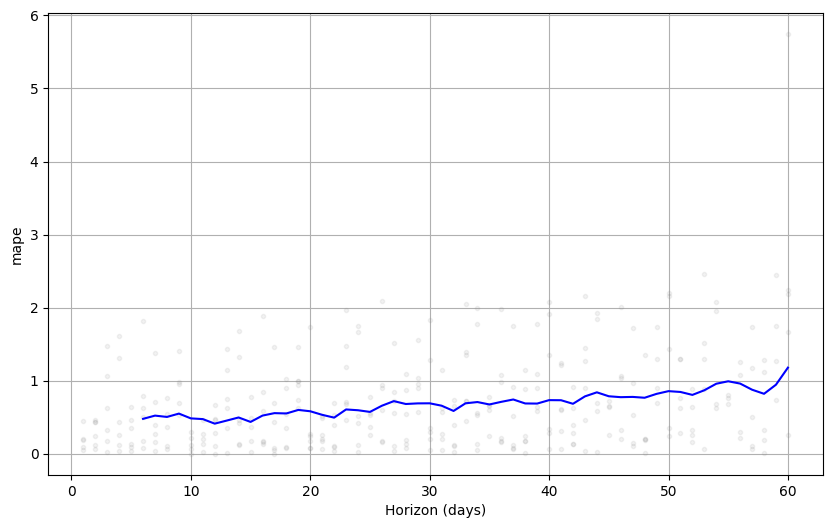

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mape')

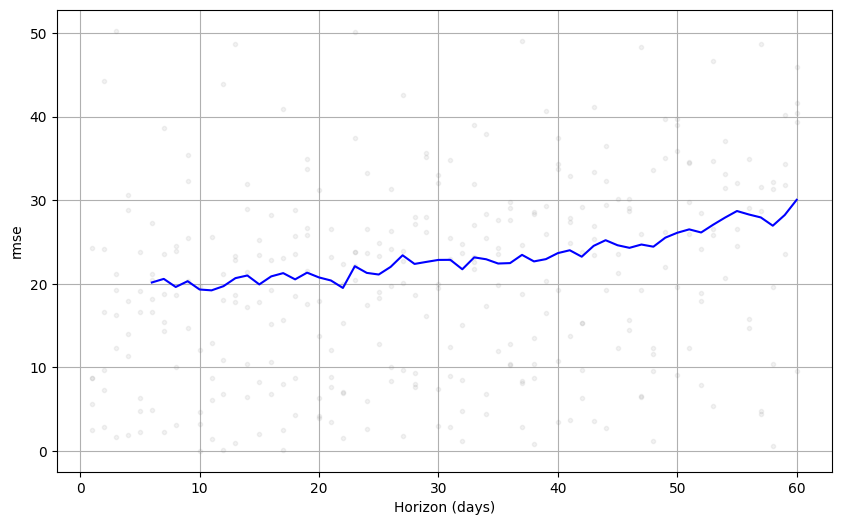

In [ ]:
fig=plot_cross_validation_metric(df_cv,metric='rmse')

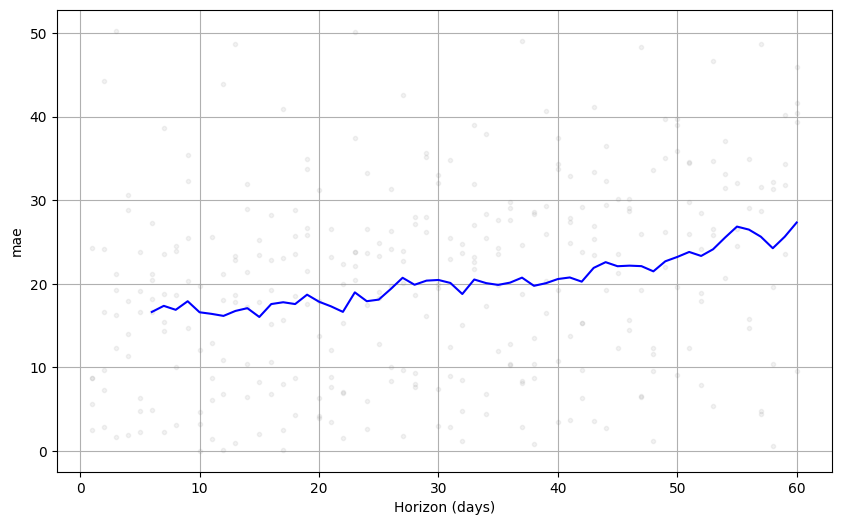

In [ ]:
fig=plot_cross_validation_metric(df_cv,metric='mae')

In [ ]:
# p1=0.01
# p2=1.0
# param_grid = {  
#      'changepoint_prior_scale': [p1],
#      'seasonality_prior_scale': [p2],
# }
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# model = Prophet(**all_params[0]).fit(df_bar)  # Fit model with given params
# df_cv = cross_validation(model, 
#                          horizon="30 days",
#                          period='1 days', #shift - moving windows
#                          initial='500 days', 
#                          )
# df_p = performance_metrics(df_cv, rolling_window=1)
# print('Il mape con i valori iniziali messi è', df_p['mape'].values[0])




import itertools
x1=list(np.arange(0.01,0.11,0.01))
x2=list(np.arange(0.050,0.060,0.001))
param_grid = {  
     #'changepoint_prior_scale': [0.001,0.01, 0.1,0.5],
     #'seasonality_prior_scale': [0.01,0.1,1,10],
      'changepoint_prior_scale': [0.0129,0.013,0.0131],
      'seasonality_prior_scale': [8.9,9,9.1]
    #'changepoint_prior_scale': x1,#[0.013],
    #'seasonality_prior_scale': x2,#[0.045],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes = []  # Store the RMSEs for each params here


# Use cross validation to evaluate all parameters
for params in all_params:
    model = Prophet(**params).fit(df_bar_rid)  # Fit model with given params
    df_cv = cross_validation(model, 
                             horizon="60 days",
                             period='10 days', #shift - moving windows
                             initial='450 days', 
                             )
    
    df_p = performance_metrics(df_cv, rolling_window=1)
    # rmses.append(df_p['rmse'].values[0])
    mapes.append(df_p['mape'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
#tuning_results['rmse'] = rmses
tuning_results['mape'] = mapes
print(tuning_results);

19:50:04 - cmdstanpy - INFO - Chain [1] start processing
19:50:04 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

19:50:05 - cmdstanpy - INFO - Chain [1] start processing
19:50:05 - cmdstanpy - INFO - Chain [1] done processing
19:50:05 - cmdstanpy - INFO - Chain [1] start processing
19:50:05 - cmdstanpy - INFO - Chain [1] done processing
19:50:06 - cmdstanpy - INFO - Chain [1] start processing
19:50:06 - cmdstanpy - INFO - Chain [1] done processing
19:50:07 - cmdstanpy - INFO - Chain [1] start processing
19:50:07 - cmdstanpy - INFO - Chain [1] done processing
19:50:07 - cmdstanpy - INFO - Chain [1] start processing
19:50:07 - cmdstanpy - INFO - Chain [1] done processing
19:50:08 - cmdstanpy - INFO - Chain [1] start processing
19:50:08 - cmdstanpy - INFO - Chain [1] done processing
19:50:09 - cmdstanpy - INFO - Chain [1] start processing
19:50:09 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

19:50:09 - cmdstanpy - INFO - Chain [1] start processing
19:50:09 - cmdstanpy - INFO - Chain [1] done processing
19:50:10 - cmdstanpy - INFO - Chain [1] start processing
19:50:10 - cmdstanpy - INFO - Chain [1] done processing
19:50:10 - cmdstanpy - INFO - Chain [1] start processing
19:50:10 - cmdstanpy - INFO - Chain [1] done processing
19:50:11 - cmdstanpy - INFO - Chain [1] start processing
19:50:11 - cmdstanpy - INFO - Chain [1] done processing
19:50:12 - cmdstanpy - INFO - Chain [1] start processing
19:50:12 - cmdstanpy - INFO - Chain [1] done processing
19:50:12 - cmdstanpy - INFO - Chain [1] start processing
19:50:12 - cmdstanpy - INFO - Chain [1] done processing
19:50:13 - cmdstanpy - INFO - Chain [1] start processing
19:50:13 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

19:50:13 - cmdstanpy - INFO - Chain [1] start processing
19:50:13 - cmdstanpy - INFO - Chain [1] done processing
19:50:14 - cmdstanpy - INFO - Chain [1] start processing
19:50:14 - cmdstanpy - INFO - Chain [1] done processing
19:50:14 - cmdstanpy - INFO - Chain [1] start processing
19:50:15 - cmdstanpy - INFO - Chain [1] done processing
19:50:15 - cmdstanpy - INFO - Chain [1] start processing
19:50:15 - cmdstanpy - INFO - Chain [1] done processing
19:50:16 - cmdstanpy - INFO - Chain [1] start processing
19:50:16 - cmdstanpy - INFO - Chain [1] done processing
19:50:16 - cmdstanpy - INFO - Chain [1] start processing
19:50:17 - cmdstanpy - INFO - Chain [1] done processing
19:50:17 - cmdstanpy - INFO - Chain [1] start processing
19:50:17 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

19:50:18 - cmdstanpy - INFO - Chain [1] start processing
19:50:18 - cmdstanpy - INFO - Chain [1] done processing
19:50:18 - cmdstanpy - INFO - Chain [1] start processing
19:50:18 - cmdstanpy - INFO - Chain [1] done processing
19:50:19 - cmdstanpy - INFO - Chain [1] start processing
19:50:19 - cmdstanpy - INFO - Chain [1] done processing
19:50:20 - cmdstanpy - INFO - Chain [1] start processing
19:50:20 - cmdstanpy - INFO - Chain [1] done processing
19:50:20 - cmdstanpy - INFO - Chain [1] start processing
19:50:20 - cmdstanpy - INFO - Chain [1] done processing
19:50:21 - cmdstanpy - INFO - Chain [1] start processing
19:50:21 - cmdstanpy - INFO - Chain [1] done processing
19:50:22 - cmdstanpy - INFO - Chain [1] start processing
19:50:22 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

19:50:22 - cmdstanpy - INFO - Chain [1] start processing
19:50:22 - cmdstanpy - INFO - Chain [1] done processing
19:50:22 - cmdstanpy - INFO - Chain [1] start processing
19:50:22 - cmdstanpy - INFO - Chain [1] done processing
19:50:23 - cmdstanpy - INFO - Chain [1] start processing
19:50:23 - cmdstanpy - INFO - Chain [1] done processing
19:50:24 - cmdstanpy - INFO - Chain [1] start processing
19:50:24 - cmdstanpy - INFO - Chain [1] done processing
19:50:24 - cmdstanpy - INFO - Chain [1] start processing
19:50:24 - cmdstanpy - INFO - Chain [1] done processing
19:50:25 - cmdstanpy - INFO - Chain [1] start processing
19:50:25 - cmdstanpy - INFO - Chain [1] done processing
19:50:26 - cmdstanpy - INFO - Chain [1] start processing
19:50:26 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

19:50:26 - cmdstanpy - INFO - Chain [1] start processing
19:50:26 - cmdstanpy - INFO - Chain [1] done processing
19:50:27 - cmdstanpy - INFO - Chain [1] start processing
19:50:27 - cmdstanpy - INFO - Chain [1] done processing
19:50:27 - cmdstanpy - INFO - Chain [1] start processing
19:50:27 - cmdstanpy - INFO - Chain [1] done processing
19:50:28 - cmdstanpy - INFO - Chain [1] start processing
19:50:28 - cmdstanpy - INFO - Chain [1] done processing
19:50:29 - cmdstanpy - INFO - Chain [1] start processing
19:50:29 - cmdstanpy - INFO - Chain [1] done processing
19:50:29 - cmdstanpy - INFO - Chain [1] start processing
19:50:29 - cmdstanpy - INFO - Chain [1] done processing
19:50:30 - cmdstanpy - INFO - Chain [1] start processing
19:50:30 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

19:50:30 - cmdstanpy - INFO - Chain [1] start processing
19:50:30 - cmdstanpy - INFO - Chain [1] done processing
19:50:31 - cmdstanpy - INFO - Chain [1] start processing
19:50:31 - cmdstanpy - INFO - Chain [1] done processing
19:50:32 - cmdstanpy - INFO - Chain [1] start processing
19:50:32 - cmdstanpy - INFO - Chain [1] done processing
19:50:32 - cmdstanpy - INFO - Chain [1] start processing
19:50:32 - cmdstanpy - INFO - Chain [1] done processing
19:50:33 - cmdstanpy - INFO - Chain [1] start processing
19:50:33 - cmdstanpy - INFO - Chain [1] done processing
19:50:33 - cmdstanpy - INFO - Chain [1] start processing
19:50:33 - cmdstanpy - INFO - Chain [1] done processing
19:50:34 - cmdstanpy - INFO - Chain [1] start processing
19:50:34 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

19:50:34 - cmdstanpy - INFO - Chain [1] start processing
19:50:34 - cmdstanpy - INFO - Chain [1] done processing
19:50:35 - cmdstanpy - INFO - Chain [1] start processing
19:50:35 - cmdstanpy - INFO - Chain [1] done processing
19:50:36 - cmdstanpy - INFO - Chain [1] start processing
19:50:36 - cmdstanpy - INFO - Chain [1] done processing
19:50:36 - cmdstanpy - INFO - Chain [1] start processing
19:50:36 - cmdstanpy - INFO - Chain [1] done processing
19:50:37 - cmdstanpy - INFO - Chain [1] start processing
19:50:37 - cmdstanpy - INFO - Chain [1] done processing
19:50:37 - cmdstanpy - INFO - Chain [1] start processing
19:50:38 - cmdstanpy - INFO - Chain [1] done processing
19:50:38 - cmdstanpy - INFO - Chain [1] start processing
19:50:38 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

19:50:39 - cmdstanpy - INFO - Chain [1] start processing
19:50:39 - cmdstanpy - INFO - Chain [1] done processing
19:50:39 - cmdstanpy - INFO - Chain [1] start processing
19:50:39 - cmdstanpy - INFO - Chain [1] done processing
19:50:40 - cmdstanpy - INFO - Chain [1] start processing
19:50:40 - cmdstanpy - INFO - Chain [1] done processing
19:50:40 - cmdstanpy - INFO - Chain [1] start processing
19:50:40 - cmdstanpy - INFO - Chain [1] done processing
19:50:41 - cmdstanpy - INFO - Chain [1] start processing
19:50:41 - cmdstanpy - INFO - Chain [1] done processing
19:50:42 - cmdstanpy - INFO - Chain [1] start processing
19:50:42 - cmdstanpy - INFO - Chain [1] done processing


   changepoint_prior_scale  seasonality_prior_scale      mape
0                   0.0129                      8.9  0.354728
1                   0.0129                      9.0  0.354529
2                   0.0129                      9.1  0.356037
3                   0.0130                      8.9  0.352479
4                   0.0130                      9.0  0.349098
5                   0.0130                      9.1  0.352647
6                   0.0131                      8.9  0.360163
7                   0.0131                      9.0  0.361480
8                   0.0131                      9.1  0.358576


In [ ]:
#mape con changepoint_prior_scale e seasonality_prior_scale: 21.96 con 0.004 e 1.5, 21.91 con 0.0042 e 1.52, 21.83 con 0.00416 e 1.52
#21.81 con 0.004164 e 1.54, 21.80 con 0.004164 e 1.541, 21.79 con 0.0041645 e 1.5406, 21.26 con 0.01 e 0.02, 21.13 con 0.0109 e 0.018
#21.11 con 0.01089 e 0.018, 21.105 con 0.010891 e 0.01802

#con df_bar_rid: 0.18.. con 0.01 e 0.1, 0.17.. con 0.014 e 0.05, 0.1703 con 0.0136 e 0.052, 0.1702 con 0.0133 e 0.051
#con df_bar_rid, initial=450, period=10 e horizon=60: 0.1691 con 0.0137 e 0.051
best_params = all_params[np.argmin(mapes)]
print(best_params, tuning_results['mape'][np.argmin(mapes)])

{'changepoint_prior_scale': 0.013, 'seasonality_prior_scale': 9} 0.3490983500060249


In [ ]:
model_tuned = Prophet(changepoint_prior_scale=0.013,
                      seasonality_prior_scale=9,
                      seasonality_mode = 'additive',
                      interval_width = 0.95,
                      daily_seasonality  = False,
                      weekly_seasonality = True,
                      yearly_seasonality = False,
                     )
model_tuned

In [ ]:
model_tuned.fit(df_bar_rid)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ALESSA~1\\AppData\\Local\\Temp\\tmpblgrqa4h\\d9s0mj30.json'

In [ ]:
df_cv_final=cross_validation(model_tuned,
                            horizon="60 days",
                            period='10 days',
                            initial='450 days',
                            )

  0%|          | 0/6 [00:00<?, ?it/s]

20:03:47 - cmdstanpy - INFO - Chain [1] start processing
20:03:47 - cmdstanpy - INFO - Chain [1] done processing
20:03:48 - cmdstanpy - INFO - Chain [1] start processing
20:03:48 - cmdstanpy - INFO - Chain [1] done processing
20:03:49 - cmdstanpy - INFO - Chain [1] start processing
20:03:49 - cmdstanpy - INFO - Chain [1] done processing
20:03:49 - cmdstanpy - INFO - Chain [1] start processing
20:03:49 - cmdstanpy - INFO - Chain [1] done processing
20:03:50 - cmdstanpy - INFO - Chain [1] start processing
20:03:50 - cmdstanpy - INFO - Chain [1] done processing
20:03:50 - cmdstanpy - INFO - Chain [1] start processing
20:03:51 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
df_performance=performance_metrics(df_cv_final)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,385.330711,19.629842,15.033257,0.328189,0.283295,0.325409,0.968750
1,7 days,392.527230,19.812300,15.977608,0.357597,0.308411,0.346421,0.989583
2,8 days,394.418310,19.859968,16.272737,0.352984,0.308352,0.349835,1.000000
3,9 days,363.513214,19.066022,15.485356,0.350479,0.296308,0.340601,1.000000
4,10 days,320.798141,17.910839,14.179922,0.312453,0.260260,0.308919,1.000000
5,11 days,274.221068,16.559622,13.063992,0.296645,0.255643,0.287018,1.000000
6,12 days,340.842705,18.461926,13.729407,0.278064,0.242744,0.289100,0.968750
7,13 days,287.669567,16.960824,12.388122,0.275056,0.236172,0.276093,0.968750
8,14 days,255.848332,15.995260,11.722938,0.287417,0.223303,0.270287,0.968750
9,15 days,301.606242,17.366814,12.575550,0.275566,0.222265,0.276582,0.968750


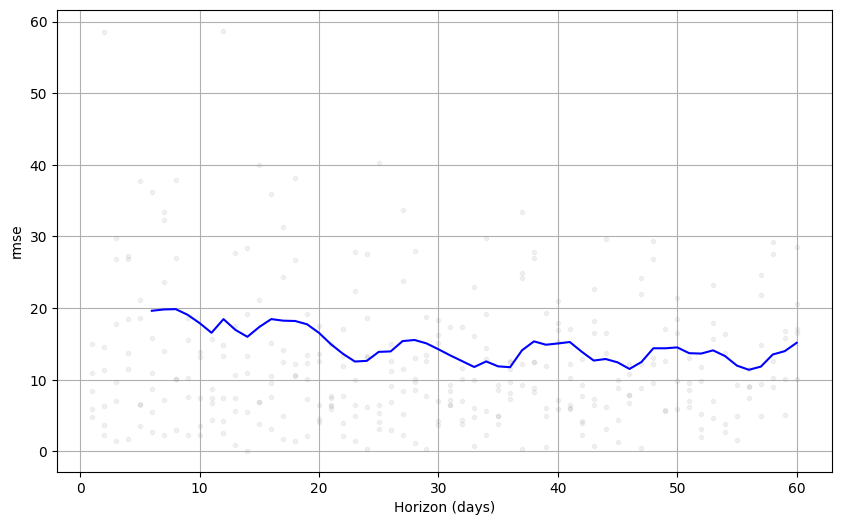

In [ ]:
fig=plot_cross_validation_metric(df_cv_final,metric='rmse')

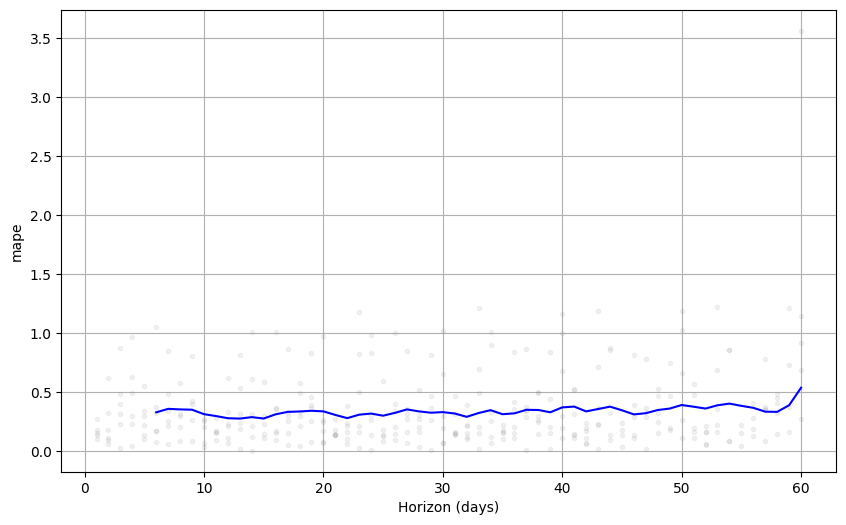

In [ ]:
fig=plot_cross_validation_metric(df_cv_final,metric='mape')

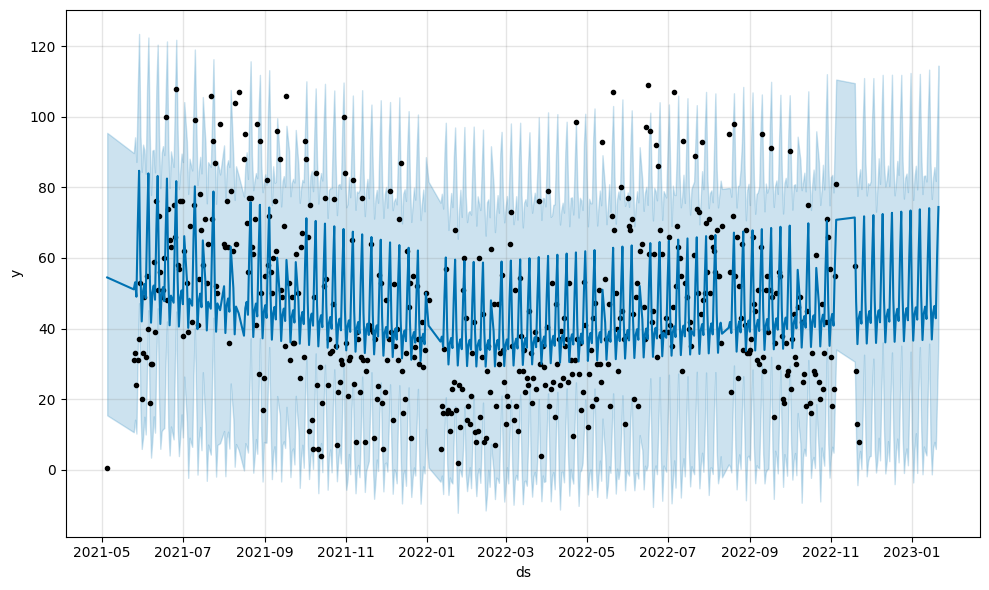

In [ ]:
plot1 = model_tuned.plot(forecast)

In [ ]:
from prophet.plot import plot_plotly
from datetime import datetime

fig = plot_plotly(model_tuned, forecast)
fig.update_layout( 
                  yaxis_title="Birre vendute",
                  xaxis_title="Data",
                  title="Vendita birre",
                  )
fig

In [ ]:
print(f"mape: {df_performance['mape'].mean()}\nmae:{df_performance['mae'].mean()}\nrmse:{df_performance['rmse'].mean()}")

mape: 0.33889955475731315
mae:12.050922525800486
rmse:14.786959478715925


In [ ]:
from prophet.plot import plot_components_plotly
plot_components_plotly(model_tuned,forecast)

In [ ]:
# Save model
import joblib

joblib.dump(model_tuned,'model_bar.pkl')

['model_bar.pkl']

In [ ]:
# model_load = joblib.load('model_XGB.pkl')
# future_w_features['pred'] = model_load.predict(future_w_features[FEATURES])
# future_w_features['pred'].plot(figsize=(10, 5),
#                                color='purple',
#                                ms=1, 
#                                lw=1,
#                                title='Future Predictions');

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 7)'>

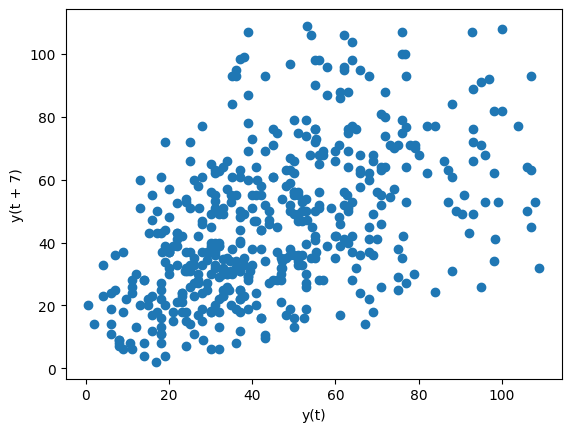

In [ ]:
from pandas.plotting import lag_plot
lag_plot(df_bar_rid['y'],7)

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 7)'>

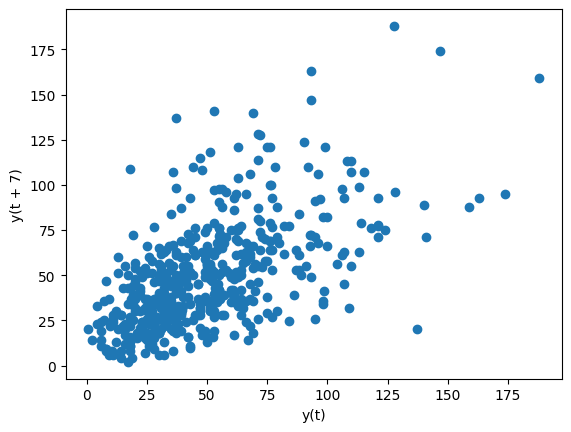

In [ ]:
from pandas.plotting import lag_plot
lag_plot(df_bar['Quantita'],7)